In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA


In [2]:
folder_path = "dados"
files = os.listdir(folder_path)
csv_files = [file for file in files if file.endswith(".csv")]
dfs = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    a_df = pd.read_csv(file_path)
    dfs.append(a_df)

df = pd.concat(dfs, axis=0, ignore_index=True)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.head()

,School,Date,SchoolYear,Enrolled,Present,Absent,Released,School DBN
0,01M015,2016-01-04,20152016,168,157,11,0,NaN
1,01M015,2016-01-05,20152016,168,153,15,0,NaN
2,01M015,2016-01-06,20152016,168,163,5,0,NaN
3,01M015,2016-01-07,20152016,168,154,14,0,NaN
4,01M015,2016-01-08,20152016,168,158,10,0,NaN


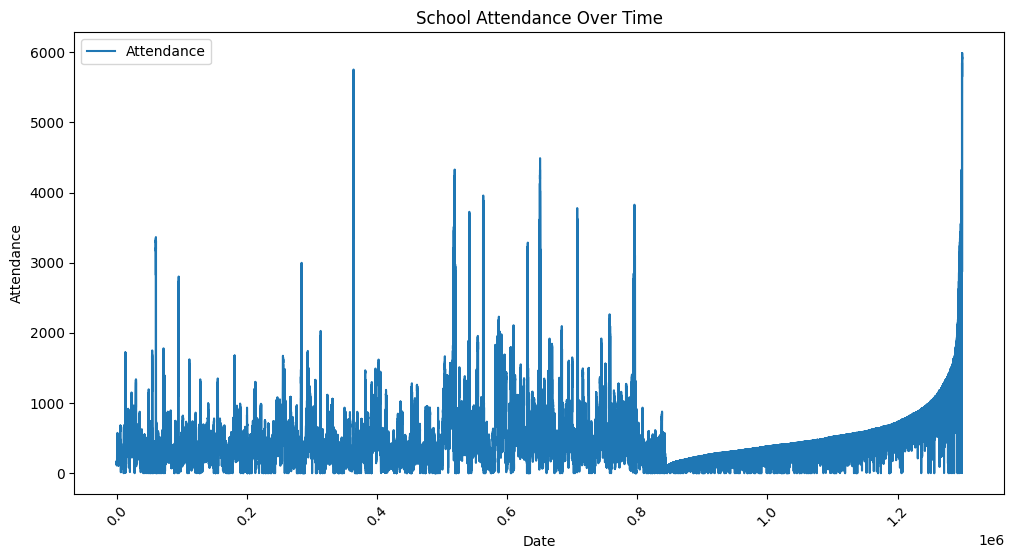

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['Present'], label='Attendance')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Attendance')
plt.title('School Attendance Over Time')
plt.legend()
plt.show()

In [ ]:
academic_year_data = df.groupby('SchoolYear').sum()

# Extract the academic years
academic_years = academic_year_data.index.tolist()

# Create a range of academic years from 2015 to 2021
all_academic_years = [str(year) + str(year + 1) for year in range(2015, 2021)]

# Fill in missing academic years with zeros
for year in all_academic_years:
    if year not in academic_years:
        academic_year_data.loc[year] = 0

# Sort the academic years in chronological order
academic_year_data = academic_year_data.loc[all_academic_years]

# Plot the data by academic year
plt.figure(figsize=(12, 6))
plt.plot(academic_year_data.index, academic_year_data['Present'], label='Attendance')
plt.xlabel('Academic Year')
plt.ylabel('Attendance')
plt.title('School Attendance by Academic Year (2015-2021)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
p, d, q = 1, 1, 1  # Replace with your chosen values
model = ARIMA(df['Present'], order=(p, d, q))
results = model.fit()

In [ ]:
residuals = results.resid
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Print a summary of the model
print(results.summary())

In [ ]:
forecast_steps = 12  # Number of future time steps to predict
forecast = results.forecast(steps=forecast_steps)